# Finetuning le modèle stabilityai/stable-diffusion-xl-base-1.0 avec LORA


In [2]:
!apt-get install git
!git clone https://github.com/huggingface/diffusers
!cd diffusers
!pip install

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
Cloning into 'diffusers'...
remote: Enumerating objects: 87060, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 87060 (delta 41), reused 19 (delta 13), pack-reused 86982 (from 3)
Receiving objects: 100% (87060/87060), 62.91 MiB | 15.48 MiB/s, done.
Resolving deltas: 100% (64054/64054), done.
ERROR: You must give at least one requirement to install (see "pip help install")


In [3]:
!pip install -r /content/diffusers/examples/text_to_image/requirements_sdxl.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 80.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [4]:
from accelerate.utils import write_basic_config

write_basic_config()

PosixPath('/root/.cache/huggingface/accelerate/default_config.yaml')

In [5]:
!pip install xformers bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 10.6 MB/s eta 0:00:00


In [2]:
from datasets import load_dataset, load_from_disk

dataset = load_dataset("/content/ziyad_images")
dataset
dataset = dataset.map(lambda x: {"text": "an image of ziyad hadine smiling"})
dataset
dataset.save_to_disk("/content/ziyad_hadine")


Generating train split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/6 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/6 [00:00<?, ? examples/s]

In [7]:
!cd diffusers && pip install -e ".[torch]"

Obtaining file:///content/diffusers
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for diffusers (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.33.0.dev0-0.editable-py3-none-any.whl size=11368 sha256=1300b8312615fb234d23deeda8de44d16665c76e4b45d6fd2448d00c66962da7
  Stored in directory: /tmp/pip-ephem-wheel-cache-jr0ckl5p/wheels/30/15/ca/ab6e88c89d6ba7047b3f155894c6c346e7cf06067fd132ae62
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.32.2
    Uninstalling diffusers-0.32.2:
      Successfully uninstalled diffusers-0.32.2


In [8]:
!accelerate launch train_text_to_image_lora_sdxl.py \
  --pretrained_model_name_or_path="stabilityai/stable-diffusion-xl-base-1.0" \
  --pretrained_vae_model_name_or_path="madebyollin/sdxl-vae-fp16-fix" \
  --dataset_name="/content/ziyad_hadine" \
  --image_column="image" \
  --caption_column="text" \
  --enable_xformers_memory_efficient_attention \
  --resolution=512 \
  --center_crop \
  --random_flip \
  --train_batch_size=1 \
  --gradient_accumulation_steps=4 \
  --gradient_checkpointing \
  --max_train_steps=800 \
  --use_8bit_adam \
  --learning_rate=1e-06 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --mixed_precision="fp16" \
  --train_text_encoder \
  --output_dir="finetuned_xl_800"


2025-04-13 12:29:24.643372: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744547364.849410    1607 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744547364.922167    1607 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-13 12:29:25.471963: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
04/13/2025 12:29:31 - INFO - __main__ - Distributed environment: DistributedType.NO
Num processes: 1
Process index: 0

In [1]:
!pip install diffusers

In [1]:
from diffusers import DiffusionPipeline, AutoencoderKL

In [ ]:
vae = AutoencoderKL.from_pretrained(
    "madebyollin/sdxl-vae-fp16-fix",
    torch_dtype=torch.float16
)
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    vae=vae,
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True,
)
pipe.load_lora_weights("/content/finetuned_xl_800", weight_name="pytorch_lora_weights.safetensors")
pipe.to("cuda")
tokenizer = pipe.tokenizer

Fetching 17 files:   0%|          | 0/17 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

  0%|          | 0/50 [00:00<?, ?it/s]

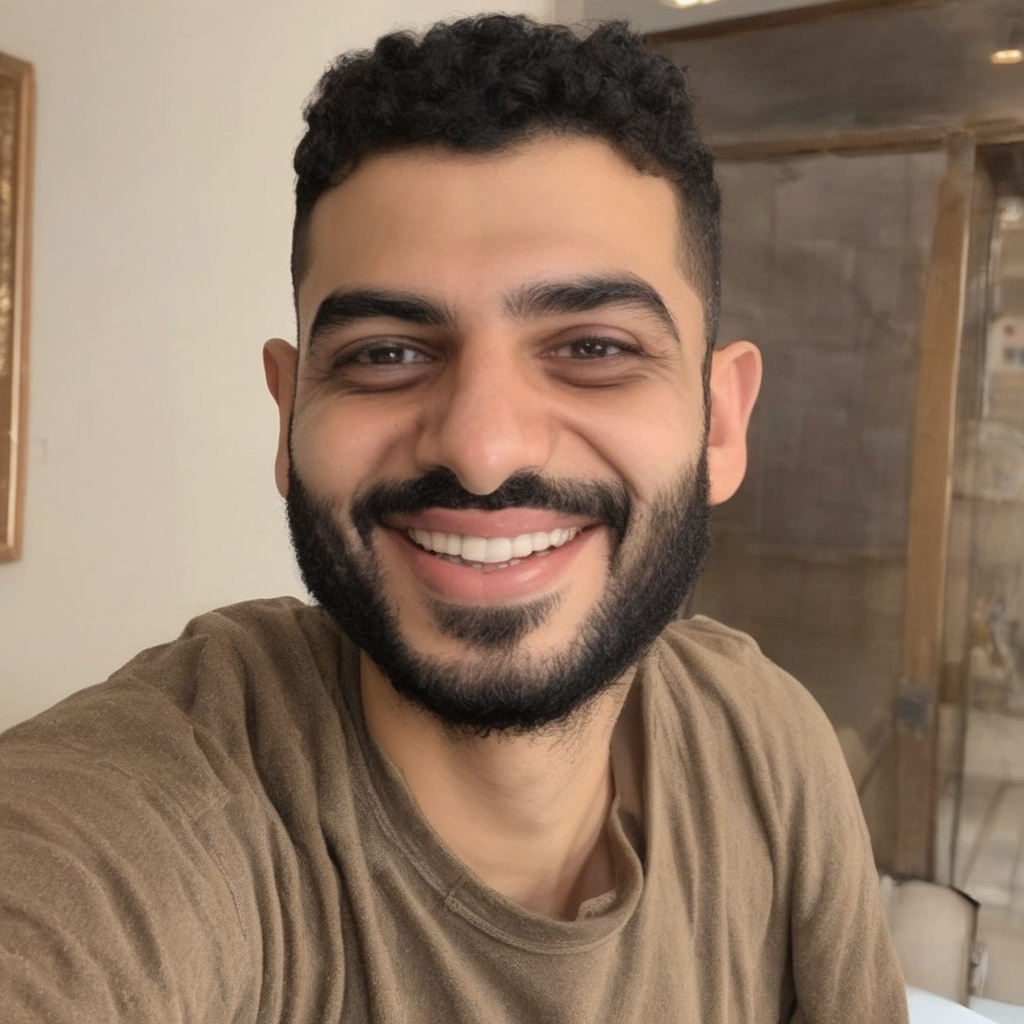

In [6]:
image = pipe("an image of ziyad hadine smiling " ).images[0]
image